In [1]:
from voxelwise_tutorials.io import get_data_home

directory = get_data_home(dataset="shortclips")
print(directory)

/home/jlg/yuerou/voxelwise_tutorials_data/shortclips


In [2]:
# modify to use another subject
subject = "S01"

In [3]:
import numpy as np
from voxelwise_tutorials.io import load_hdf5_array

In [4]:
import os

file_name = os.path.join(directory, 'responses', f'{subject}_responses.hdf')
Y_test = load_hdf5_array(file_name, key="Y_test")
print("(n_repeats, n_samples_test, n_voxels) =", Y_test.shape)

(n_repeats, n_samples_test, n_voxels) = (10, 270, 84038)


In [5]:
from voxelwise_tutorials.utils import explainable_variance

ev = explainable_variance(Y_test)
print("(n_voxels,) =", ev.shape)

(n_voxels,) = (84038,)


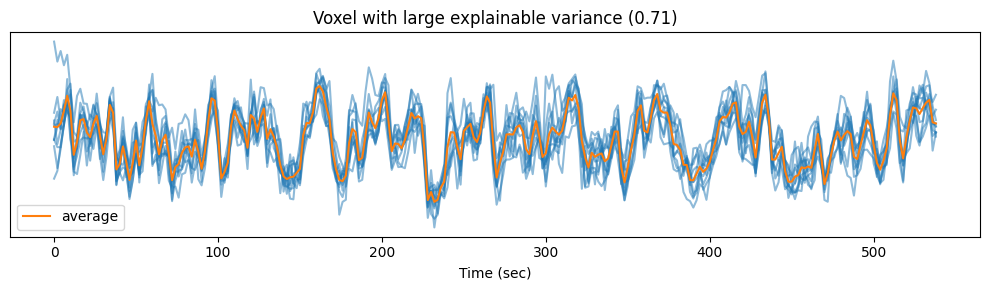

In [6]:
import matplotlib.pyplot as plt

voxel_1 = np.argmax(ev)
time = np.arange(Y_test.shape[1]) * 2  # one time point every 2 seconds
plt.figure(figsize=(10, 3))
plt.plot(time, Y_test[:, :, voxel_1].T, color='C0', alpha=0.5)
plt.plot(time, Y_test[:, :, voxel_1].mean(0), color='C1', label='average')
plt.xlabel("Time (sec)")
plt.title("Voxel with large explainable variance (%.2f)" % ev[voxel_1])
plt.yticks([])
plt.legend()
plt.tight_layout()
plt.show()

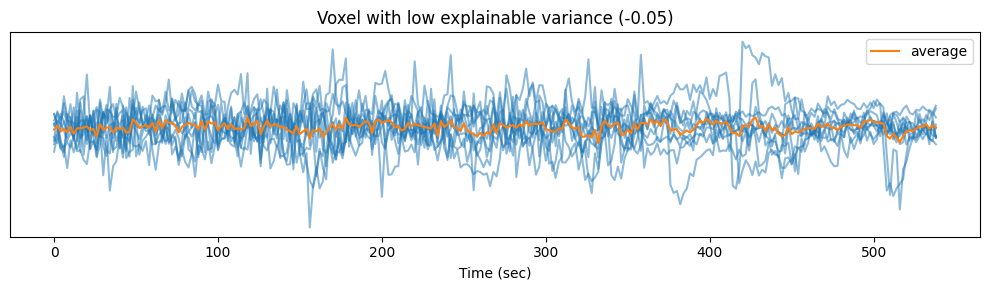

In [7]:
voxel_2 = np.argmin(ev)
plt.figure(figsize=(10, 3))
plt.plot(time, Y_test[:, :, voxel_2].T, color='C0', alpha=0.5)
plt.plot(time, Y_test[:, :, voxel_2].mean(0), color='C1', label='average')
plt.xlabel("Time (sec)")
plt.title("Voxel with low explainable variance (%.2f)" % ev[voxel_2])
plt.yticks([])
plt.legend()
plt.tight_layout()
plt.show()

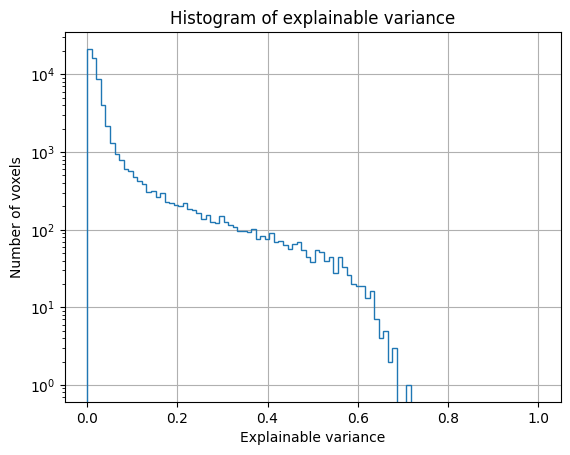

In [8]:
plt.hist(ev, bins=np.linspace(0, 1, 100), log=True, histtype='step')
plt.xlabel("Explainable variance")
plt.ylabel("Number of voxels")
plt.title('Histogram of explainable variance')
plt.grid('on')
plt.show()

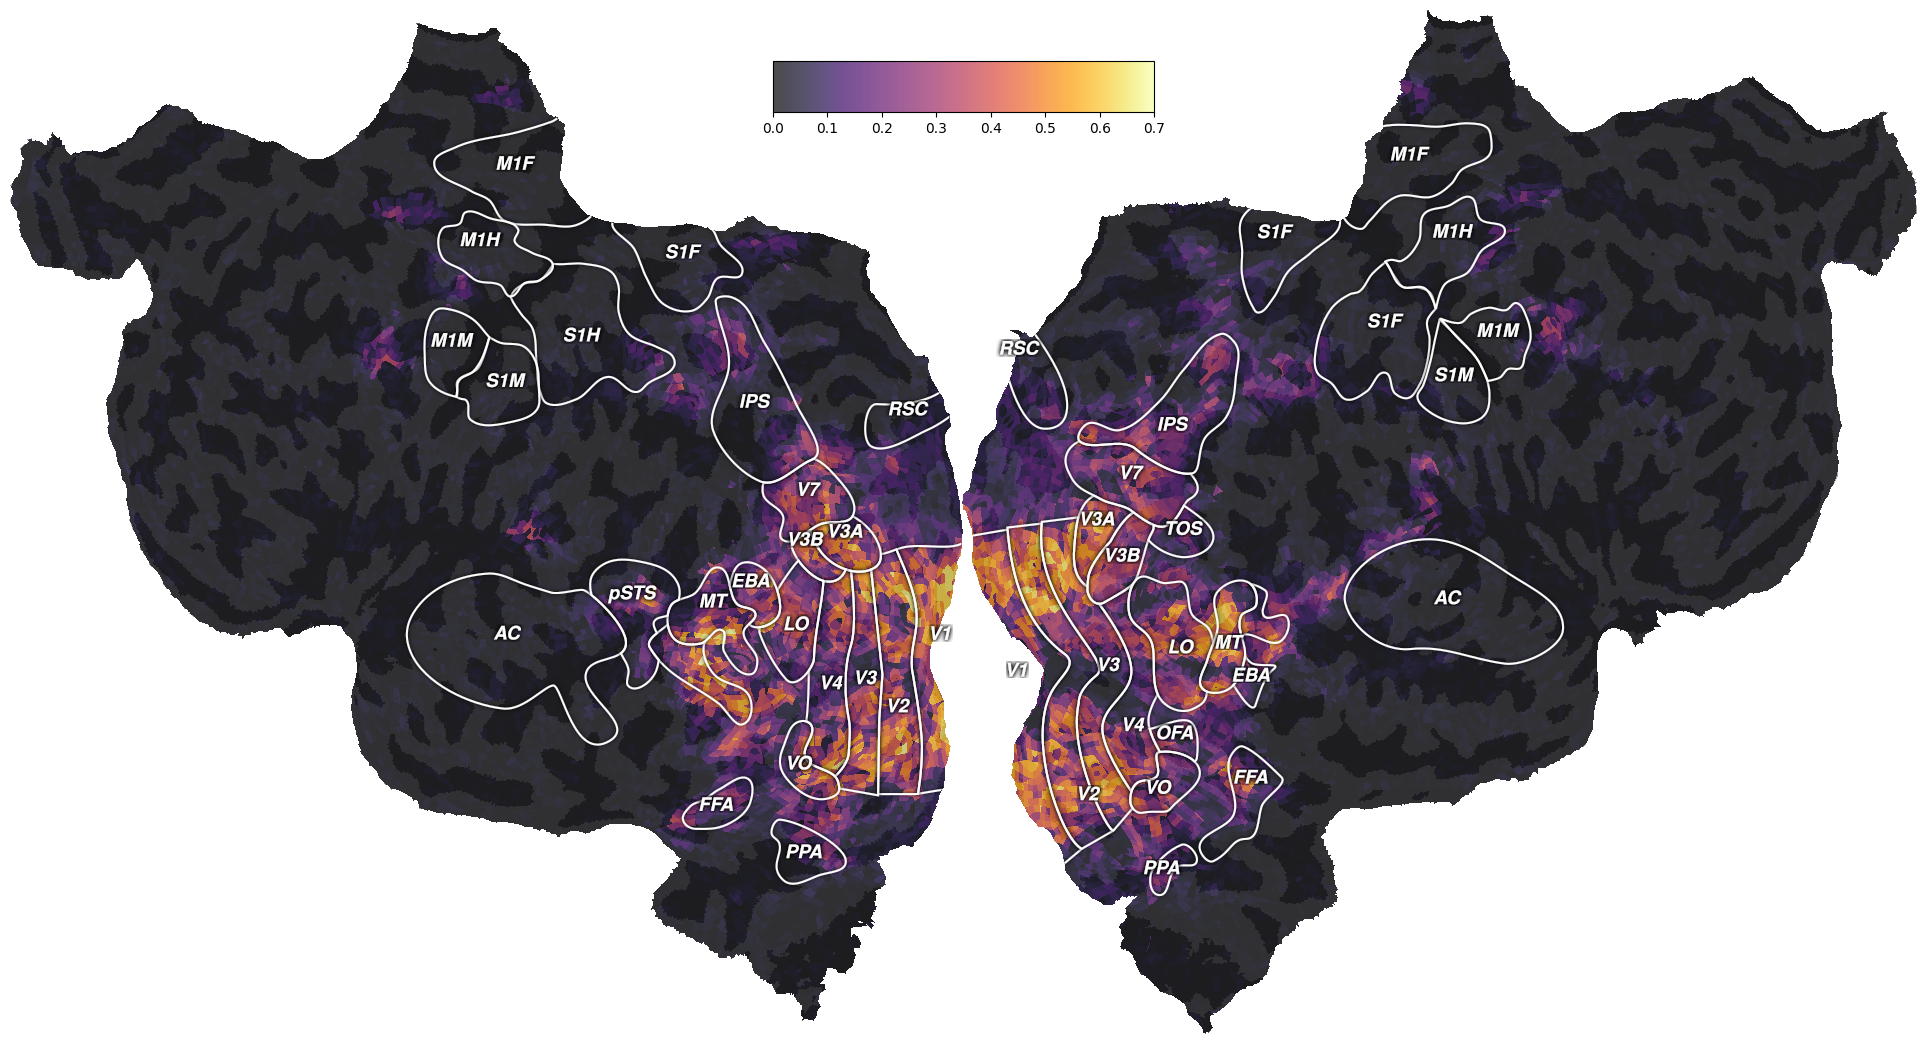

In [9]:
from voxelwise_tutorials.viz import plot_flatmap_from_mapper

mapper_file = os.path.join(directory, 'mappers', f'{subject}_mappers.hdf')
plot_flatmap_from_mapper(ev, mapper_file, vmin=0, vmax=0.7)
plt.show()

In [10]:
import cortex

surface = "fsaverage"

if not hasattr(cortex.db, surface):
    cortex.utils.download_subject(subject_id=surface,
                                  pycortex_store=cortex.db.filestore)
    cortex.db.reload_subjects()  # force filestore reload
    assert hasattr(cortex.db, surface)

In [11]:
from voxelwise_tutorials.io import load_hdf5_sparse_array

voxel_to_fsaverage = load_hdf5_sparse_array(mapper_file,
                                            key='voxel_to_fsaverage')
ev_projected = voxel_to_fsaverage @ ev
print("(n_vertices,) =", ev_projected.shape)

(n_vertices,) = (327684,)


In [12]:
vertex = cortex.Vertex(ev_projected, surface, vmin=0, vmax=0.7, cmap='viridis')

In [13]:
run_webshow = False
if run_webshow:
    cortex.webshow(vertex, open_browser=False, port=8050)

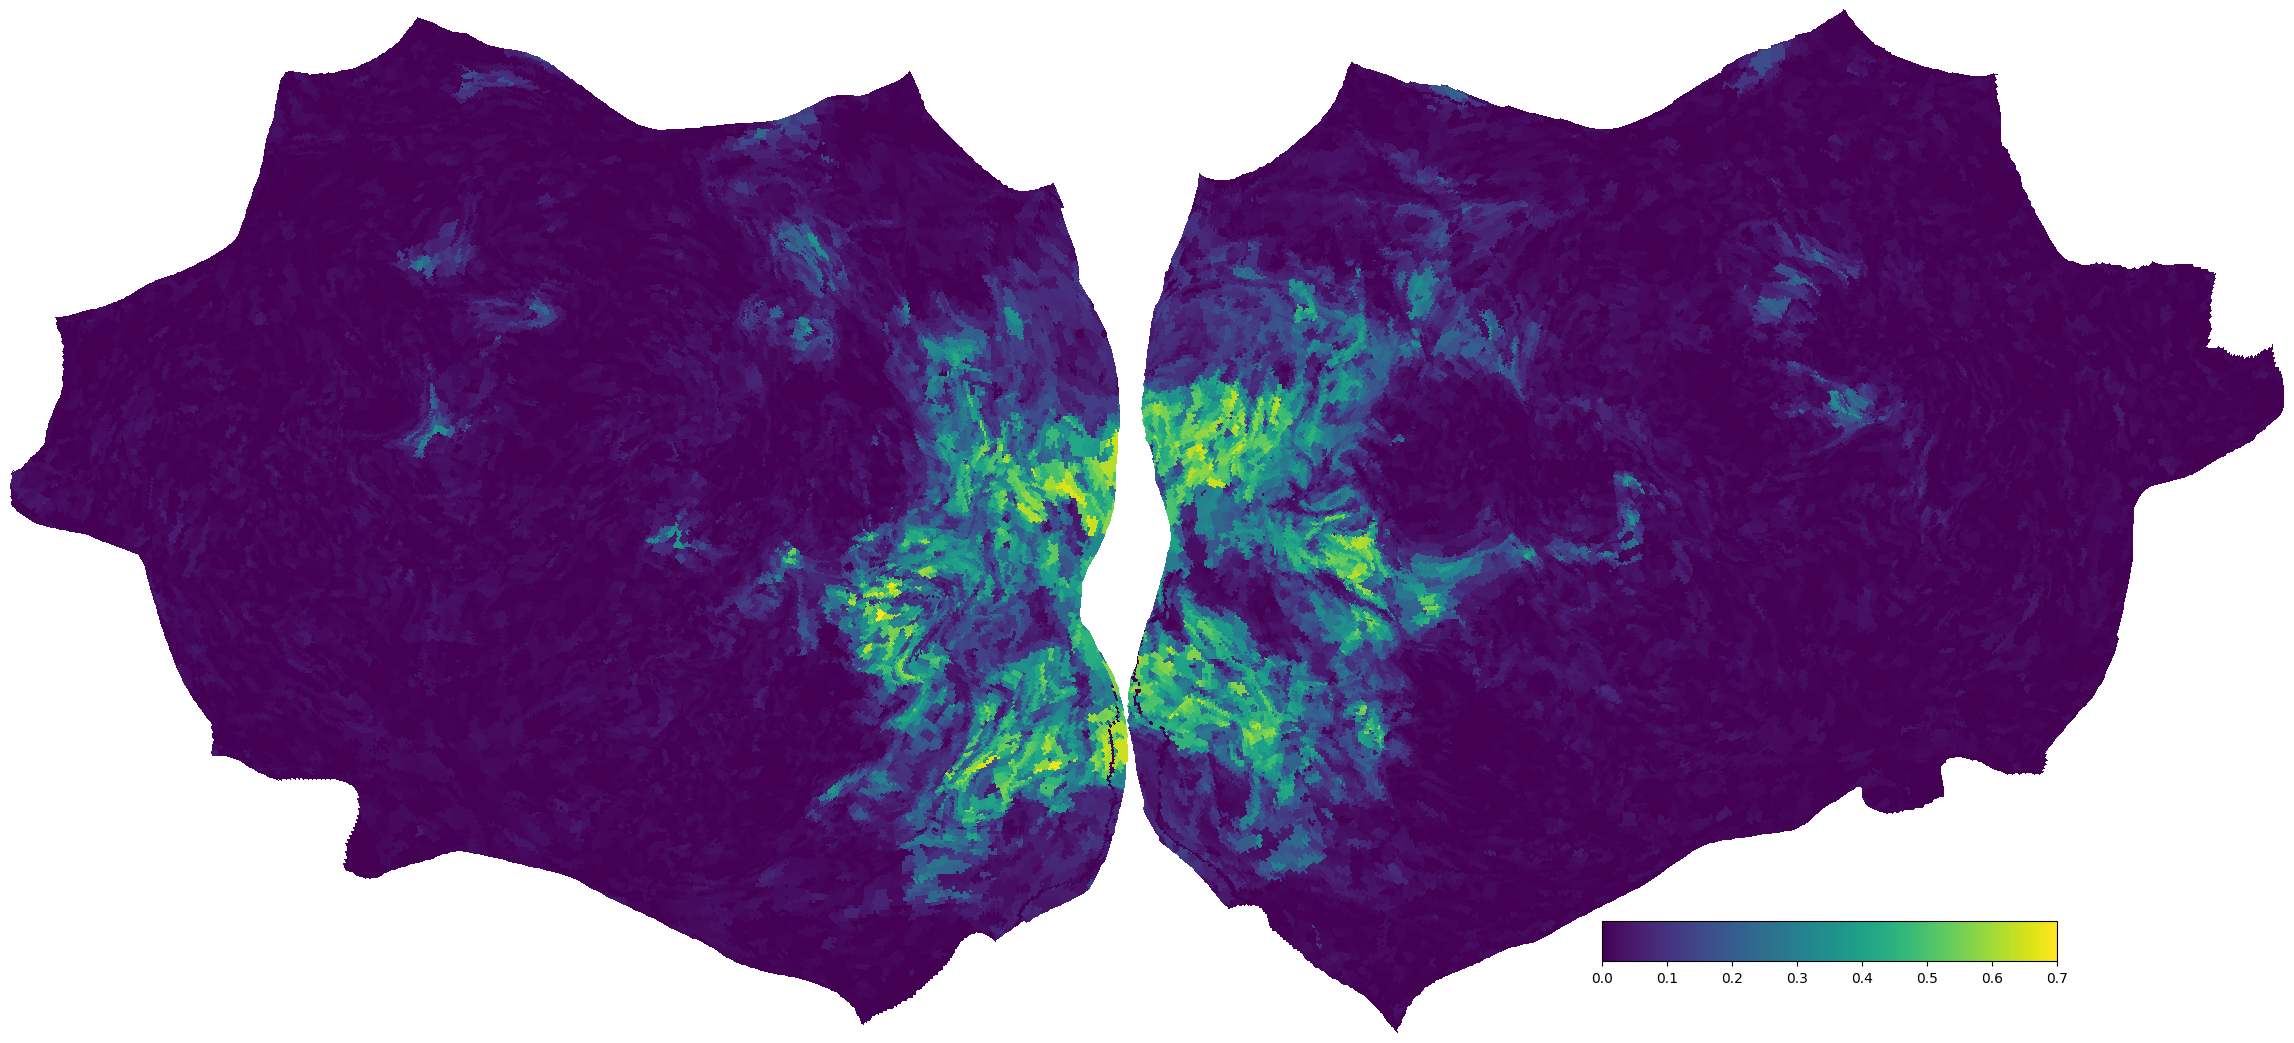

In [14]:
from cortex.testing_utils import has_installed

fig = cortex.quickshow(vertex, colorbar_location='right',
                       with_rois=has_installed("inkscape"))
plt.show()